In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [15]:
# Bước 1: Nhập dữ liệu
data = pd.read_csv(r'DataTest\DataCharTest.csv')

# Giả sử các cột có tên 'Year' và 'Month'
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)
ts = data['Value']

print(data.head(10))

               Value  Month  Year
Date                             
2013-08-01  1.626380      8  2013
2013-09-01  1.475870      9  2013
2013-10-01  1.440750     10  2013
2013-11-01  1.822164     11  2013
2013-12-01  1.720148     12  2013
2014-01-01  1.823951      1  2014
2014-02-01  2.183461      2  2014
2014-03-01  2.074944      3  2014
2014-04-01  2.043887      4  2014
2014-05-01  1.932416      5  2014


In [17]:
# Kiểm tra tính dừng bằng kiểm định ADF
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# Nếu chuỗi không dừng, thực hiện lấy sai phân
if result[1] > 0.05:
    ts_diff = ts.diff().dropna()
    result_diff = adfuller(ts_diff)
    print('ADF Statistic (Differenced):', result_diff[0])
    print('p-value (Differenced):', result_diff[1])
    for key, value in result_diff[4].items():
        print('Critical Values (Differenced):')
        print(f'   {key}, {value}')

ADF Statistic: -2.584570726945964
p-value: 0.09622829953128592
Critical Values:
   1%, -3.5078527246648834
Critical Values:
   5%, -2.895382030636155
Critical Values:
   10%, -2.584823877658872
ADF Statistic (Differenced): -4.273232880655166
p-value (Differenced): 0.0004940884596499476
Critical Values (Differenced):
   1%, -3.5078527246648834
Critical Values (Differenced):
   5%, -2.895382030636155
Critical Values (Differenced):
   10%, -2.584823877658872


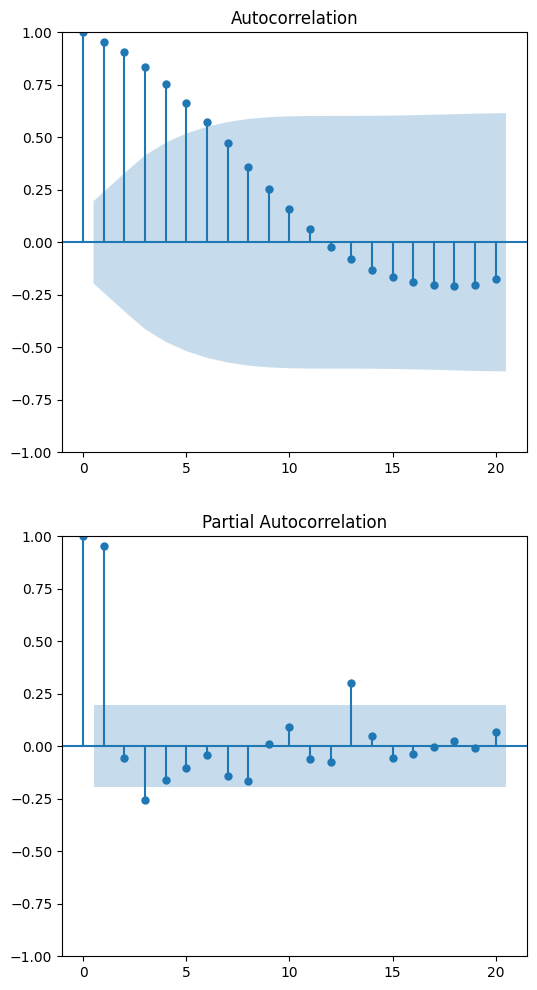

In [18]:
# Xác định các tham số p, d, q bằng đồ thị ACF và PACF
plt.figure(figsize=(6, 12))
plt.subplot(211)
plot_acf(ts, ax=plt.gca(), lags=20)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=20)
plt.show()

In [19]:
# Xây dựng mô hình ARIMA trên toàn bộ tập dữ liệu
p, d, q = 1, 1, 1  # Thay đổi theo đồ thị ACF, PACF
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
# Dự báo giá trị
forecast = model_fit.fittedvalues

In [21]:
# Đánh giá mô hình
ts_nonan = ts.dropna()
mse_test = mean_squared_error(ts_nonan, forecast)
mae_test = mean_absolute_error(ts_nonan, forecast)
mape_test = np.mean(np.abs((ts_nonan - forecast) / ts_nonan))
rmse_test = np.sqrt(mse_test)

print("Mean Squared Error (MSE):", mse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Absolute Percentage Error (MAPE):", mape_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

Mean Squared Error (MSE): 0.10099098856055302
Mean Absolute Error (MAE): 0.22576703241759324
Mean Absolute Percentage Error (MAPE): 1.1530408752366852
Root Mean Squared Error (RMSE): 0.31779079370012125


In [ ]:
# Define the forecast_steps function
def forecast_steps(y_train, steps):
	# Fit ARIMA model
	model = ARIMA(y_train, order=(p, d, q))
	model_fit = model.fit()
	
	# Forecast next steps
	arima_forecast = model_fit.forecast(steps=steps)
	
	# Placeholder for Holt-Winters forecast (not implemented)
	holt_winters_forecast = [None] * steps
	
	return holt_winters_forecast, arima_forecast

# Define y_train as the training data (subset of ts)
y_train = ts

# Forecast next m steps
steps = 1
holt_winters_forecast, arima_forecast = forecast_steps(y_train, steps)

print(f"Holt-Winters Forecast (Next {steps} steps): {holt_winters_forecast}")
print(f"ARIMA Forecast (Next {steps} steps): {arima_forecast}")

Holt-Winters Forecast (Next 1 steps): [None]
ARIMA Forecast (Next 1 steps): 2021-12-01    0.481339
Freq: MS, dtype: float64


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


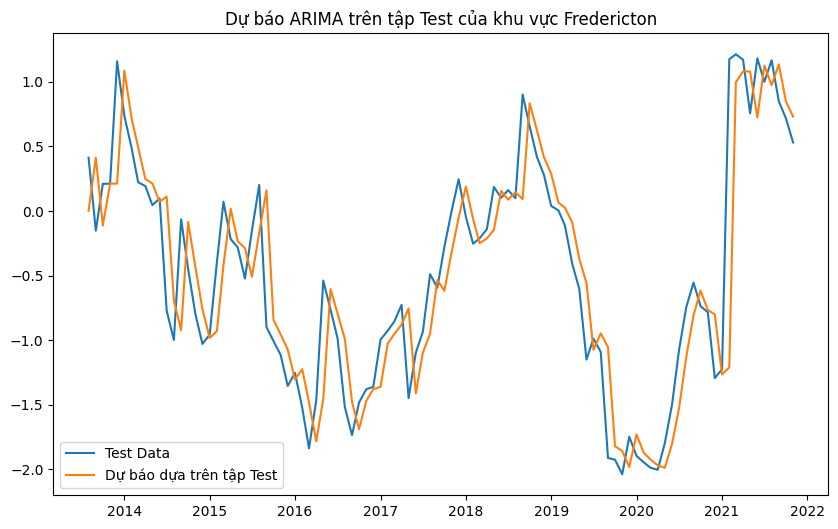

In [404]:
# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự báo
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Test Data')
plt.plot(forecast, label='Dự báo dựa trên tập Test')
plt.title('Dự báo ARIMA trên tập Test của khu vực Fredericton')
plt.legend()
plt.show()